In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/jared/Library/Group Containers/UBF8T346G9.OneDriveStandaloneSuite/OneDrive.noindex/OneDrive/Documents/University stuff/Masters Year/DS4I/Assignment2_code/project':
  os.chdir(r'/Users/jared/Library/Group Containers/UBF8T346G9.OneDriveStandaloneSuite/OneDrive.noindex/OneDrive/Documents/University stuff/Masters Year/DS4I/Assignment2_code/project')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_16414/782715493.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/importlib/_bootstrap.py": 1687560475.899881, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/importlib/_bootstrap_external.py": 1687560475.905339, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/codecs.py": 1687560473.470777, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/aliases.py": 1687560474.989399, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/__init__.py": 1687560474.985129, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/utf_8.py": 1687560475.43757, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/abc.py": 1687560473.346976, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/io.py": 1687560473.627098, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/stat.py": 1687560473.825673, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/_

In [2]:
# TODO AT THE END!
a = 1

In [3]:
# Loading in the necessary libraries
import zipfile
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from itertools import cycle
import seaborn as sns
import numpy as np
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords, words
from nltk.stem import WordNetLemmatizer


In [4]:
# Unzip the file and get the list of filenames
with zipfile.ZipFile("data/speeches.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

filenames = os.listdir("data")
filenames = [filename for filename in filenames if filename.endswith('.txt')]

# Read the content of each speech file and extract the date from the first line
speeches = []
dates = []
for filename in filenames:
    with open(os.path.join("data", filename), 'r', encoding='utf-8') as file:
        # Extract date from the first line
        date = file.readline().strip()
        dates.append(date)
        
        # Read the rest of the file
        speeches.append(file.read())

# Create DataFrame
sona = pd.DataFrame({'filename': filenames, 'speech': speeches, 'date': dates})

# Extract year and president for each speech
sona['year'] = sona['filename'].str[:4]
sona['president'] = sona['filename'].str.split('_').str[-1].str.split('.').str[0]

# Clean the sona dataset by removing unnecessary text
replace_reg = r'(http.*?(\s|.$))|(www.*?(\s|.$))|&amp;|&lt;|&gt;|\n'
sona['speech'] = sona['speech'].str.replace(replace_reg, ' ')

# Split speeches into sentences
sona_sentences = sona.copy()

sona_sentences['speech'] = sona_sentences['speech'].str.replace('\n', '').str.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')

# Make a csv of the speeches
sona.to_csv('data/sona_speeches.csv', index=False)

In [5]:
# Make sure to download the necessary NLTK corpus if you haven't already
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('words')

# Read in the sona speeches dataset
sona_speeches_df = pd.read_csv('data/sona_speeches.csv')
sona_sentences_clean = sona_sentences.copy()

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
english_words = set(words.words())
additional_words = {
    'honourable', 'member', 'south', 'africa', 'african', 'year',
    'madame', 'madam', 'soes', 'ms', 'madams', 'madames'
}

# Function to convert NLTK's part-of-speech tags to WordNet's part-of-speech tags
def get_wordnet_pos(word):
    """Map NLTK part of speech tags to WordNet part of speech tags."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

# Clean the text, convert to lowercase, and lemmatize each word
def clean_text(text):
    # Remove special characters: keep only letters, numbers, and basic punctuation
    text = re.sub(r'[.;]', ' ', text)  # Replaces periods with spaces
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()  # Convert to lowercase
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Remove additional words
    words = [word for word in words if word not in additional_words]

    # Lemmatize each word with the correct POS tag
    lemmatized_words = []
    for word, tag in nltk.pos_tag(words):
        wntag = get_wordnet_pos(tag)
        lemmatized_word = lemmatizer.lemmatize(word, wntag)
        # Only append the lemmatized word if it is in the set of English words
        if lemmatized_word in english_words:
            lemmatized_words.append(lemmatized_word)
    
    # Join the lemmatized words back into one string
    text = ' '.join(words)
    return text

# Apply the cleaning function to the speech column
sona_speeches_df['speech'] = sona_speeches_df['speech'].apply(clean_text)

# Apply the cleaning to the sentences too
sona_sentences_clean['speech'] = sona_sentences_clean['speech'].apply(lambda speeches: [clean_text(sentence) for sentence in speeches])

# Make a csv of the speeches
sona_speeches_df.to_csv('data/sona_speeches_adapted.csv', index=False)

# Make a csv of the sentences
sona_sentences_clean.to_csv('data/sona_sentences_clean.csv', index=False)

In [6]:
from ast import literal_eval

sona_sentences_clean = pd.read_csv('data/sona_sentences_clean.csv')
sona_sentences_clean['speech'] = sona_sentences_clean['speech'].apply(literal_eval)

sona_speeches_clean = pd.read_csv('data/sona_speeches_adapted.csv')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

max_features = 2000

bow_vectorizer = CountVectorizer(max_features=max_features)
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Transformed on the words
bow_matrix_words = bow_vectorizer.fit_transform(sona_speeches_clean['speech'])
tfidf_matrix_words = tfidf_vectorizer.fit_transform(sona_speeches_clean['speech'])


In [8]:
from matplotlib.colors import LinearSegmentedColormap

cmap = plt.cm.cividis

norm = plt.Normalize(0, 100)

# Define a colour map based on cividis
# Define a new colormap using a smaller slice of the cividis colormap, this time stopping well before the yellows
cividis_modified = cmap(np.linspace(0, 0.4, cmap.N))  # Using only 40% of the colormap range

# Create a new colormap from the data
cividis_no_yellow_light = LinearSegmentedColormap.from_list('cividis_no_yellow_light', cividis_modified)

# Let's pick three colors from the modified colormap
colors = [cividis_no_yellow_light(norm(0)), 
          cividis_no_yellow_light(norm(50)), 
          cividis_no_yellow_light(norm(100))]

In [9]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import matplotlib.pyplot as plt

# Function to count words in speeches excluding stopwords
def get_word_frequencies(speeches, stopwords):
    word_counts = Counter()
    for speech in speeches:
        words = speech.lower().split()
        # Remove stopwords from the count
        words = [word.strip('.,!?"\'-()') for word in words if word.strip('.,!?"\'-()') not in stopwords]
        word_counts.update(words)
    return word_counts

# Get the word frequencies excluding stopwords
word_frequencies = get_word_frequencies(sona_speeches_clean['speech'], ENGLISH_STOP_WORDS)

# Get the top 10 most frequent words across all speeches
top_10_words = word_frequencies.most_common(10)

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar([word for word, count in top_10_words], [count for word, count in top_10_words], color=colors[0])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig(f'saved_plots/overall_top_words.png', bbox_inches='tight')
plt.close()  # Close the figure to avoid displaying it in the notebook

In [11]:
# Function to get top N frequent words for each president
def get_top_words_by_president(speeches_df, n, stopwords):
    presidents = speeches_df['president'].unique()
    top_words_by_president = {}
    for president in presidents:
        president_speeches = speeches_df[speeches_df['president'] == president]['speech']
        word_frequencies = get_word_frequencies(president_speeches, stopwords)
        top_words_by_president[president] = word_frequencies.most_common(n)
    return top_words_by_president

# Get the top 10 most frequent words for each president
top_10_words_by_president = get_top_words_by_president(sona_speeches_clean, 10, ENGLISH_STOP_WORDS)

In [12]:
# Plot the word frequenceis for each president
for president, top_words in top_10_words_by_president.items():
    
    # Individual plot for each president
    plt.figure(figsize=(10, 6))
    plt.bar([word for word, count in top_words], [count for word, count in top_words], color=colors[0])
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    # Save the plot as a PNG file
    plt.savefig(f'saved_plots/{president}_top_words.png', bbox_inches='tight')
    plt.close()  # Close the figure to avoid displaying it in the notebook

In [13]:
import pandas as pd
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank
from afinn import Afinn

# Define a function to get Bing lexicon sentiment scores
def get_bing_sentiment(text):
    tokenizer = treebank.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text.lower())
    pos_score = sum(1 for word in tokens if word in positive_words)
    neg_score = sum(1 for word in tokens if word in negative_words)
    compound_score = pos_score - neg_score
    return {'positive': pos_score, 'negative': neg_score, 'compound': compound_score}


# Load the AFINN lexicon
afinn = Afinn()

# Define a function to get AFINN sentiment scores
def get_afinn_sentiment(text):
    return afinn.score(text)

# Load positive and negative words
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Apply Bing sentiment analysis
sona_speeches_clean['bing_sentiment'] = sona_speeches_clean['speech'].apply(get_bing_sentiment)

# Apply AFINN sentiment analysis
sona_speeches_clean['afinn_sentiment'] = sona_speeches_clean['speech'].apply(lambda text: get_afinn_sentiment(text))

In [14]:
# OLD CODE BELOW

# import pandas as pd
# import matplotlib.pyplot as plt
# from textblob import TextBlob
# from afinn import Afinn
# from nltk.corpus import opinion_lexicon
# from nltk.tokenize import word_tokenize, treebank

# # Make sure to download the necessary NLTK corpora if you haven't already
# import nltk
# # nltk.download('opinion_lexicon')
# # nltk.download('punkt')

# # Initialize Afinn and prepare Bing lexicon
# afinn = Afinn()
# positive_words = set(opinion_lexicon.positive())
# negative_words = set(opinion_lexicon.negative())

# # Function to calculate sentiment scores using Afinn
# def afinn_sentiment(text):
#     return afinn.score(text)

# # Function to calculate sentiment scores using Bing lexicon
# def bing_sentiment(word):
#     if word in positive_words:
#         return 1  # Positive sentiment
#     elif word in negative_words:
#         return -1  # Negative sentiment
#     else:
#         return 0  # Neutral sentiment

# # Function to analyze the sentiment of each word in the speech
# def analyze_sentiment(speech):
#     # Tokenize words
#     words = word_tokenize(speech)
    
#     # TextBlob
#     tb_sentiments = [TextBlob(word).sentiment.polarity for word in words]
    
#     # Afinn
#     afinn_sentiments = [afinn_sentiment(word) for word in words]
    
#     # Bing
#     bing_sentiments = [bing_sentiment(word) for word in words]
    
#     # Aggregate results
#     sentiment_data = pd.DataFrame({
#         'word': words,
#         'textblob': tb_sentiments,
#         'afinn': afinn_sentiments,
#         'bing': bing_sentiments
#     })
    
#     return sentiment_data

# # Apply the sentiment analysis
# all_sentiments = pd.concat([analyze_sentiment(speech) for speech in sona_speeches_df['speech']])

# # Group by word and calculate mean sentiment
# aggregated_sentiments = all_sentiments.groupby('word').agg('mean').reset_index()

# # Function to plot bar graphs for the words that contribute most to sentiment
# def plot_sentiment_words(sentiment_df, lexicon_name):
#     top_positive = sentiment_df[sentiment_df[lexicon_name] > 0].sort_values(by=lexicon_name, ascending=False).head(10)
#     top_negative = sentiment_df[sentiment_df[lexicon_name] < 0].sort_values(by=lexicon_name).head(10)
    
#     fig, axes = plt.subplots(1, 2, figsize=(15, 6))
#     axes[0].barh(top_positive['word'], top_positive[lexicon_name])
#     axes[0].set_title('Top Positive Words - ' + lexicon_name)
#     axes[0].invert_yaxis()  # labels read top-to-bottom
#     axes[0].set_xlabel('Sentiment Score')

#     axes[1].barh(top_negative['word'], top_negative[lexicon_name])
#     axes[1].set_title('Top Negative Words - ' + lexicon_name)
#     axes[1].invert_yaxis()  # labels read top-to-bottom
#     axes[1].set_xlabel('Sentiment Score')

#     plt.tight_layout()
#     plt.show()

# # Plot for each lexicon
# plot_sentiment_words(aggregated_sentiments, 'textblob')
# plot_sentiment_words(aggregated_sentiments, 'afinn')
# plot_sentiment_words(aggregated_sentiments, 'bing')


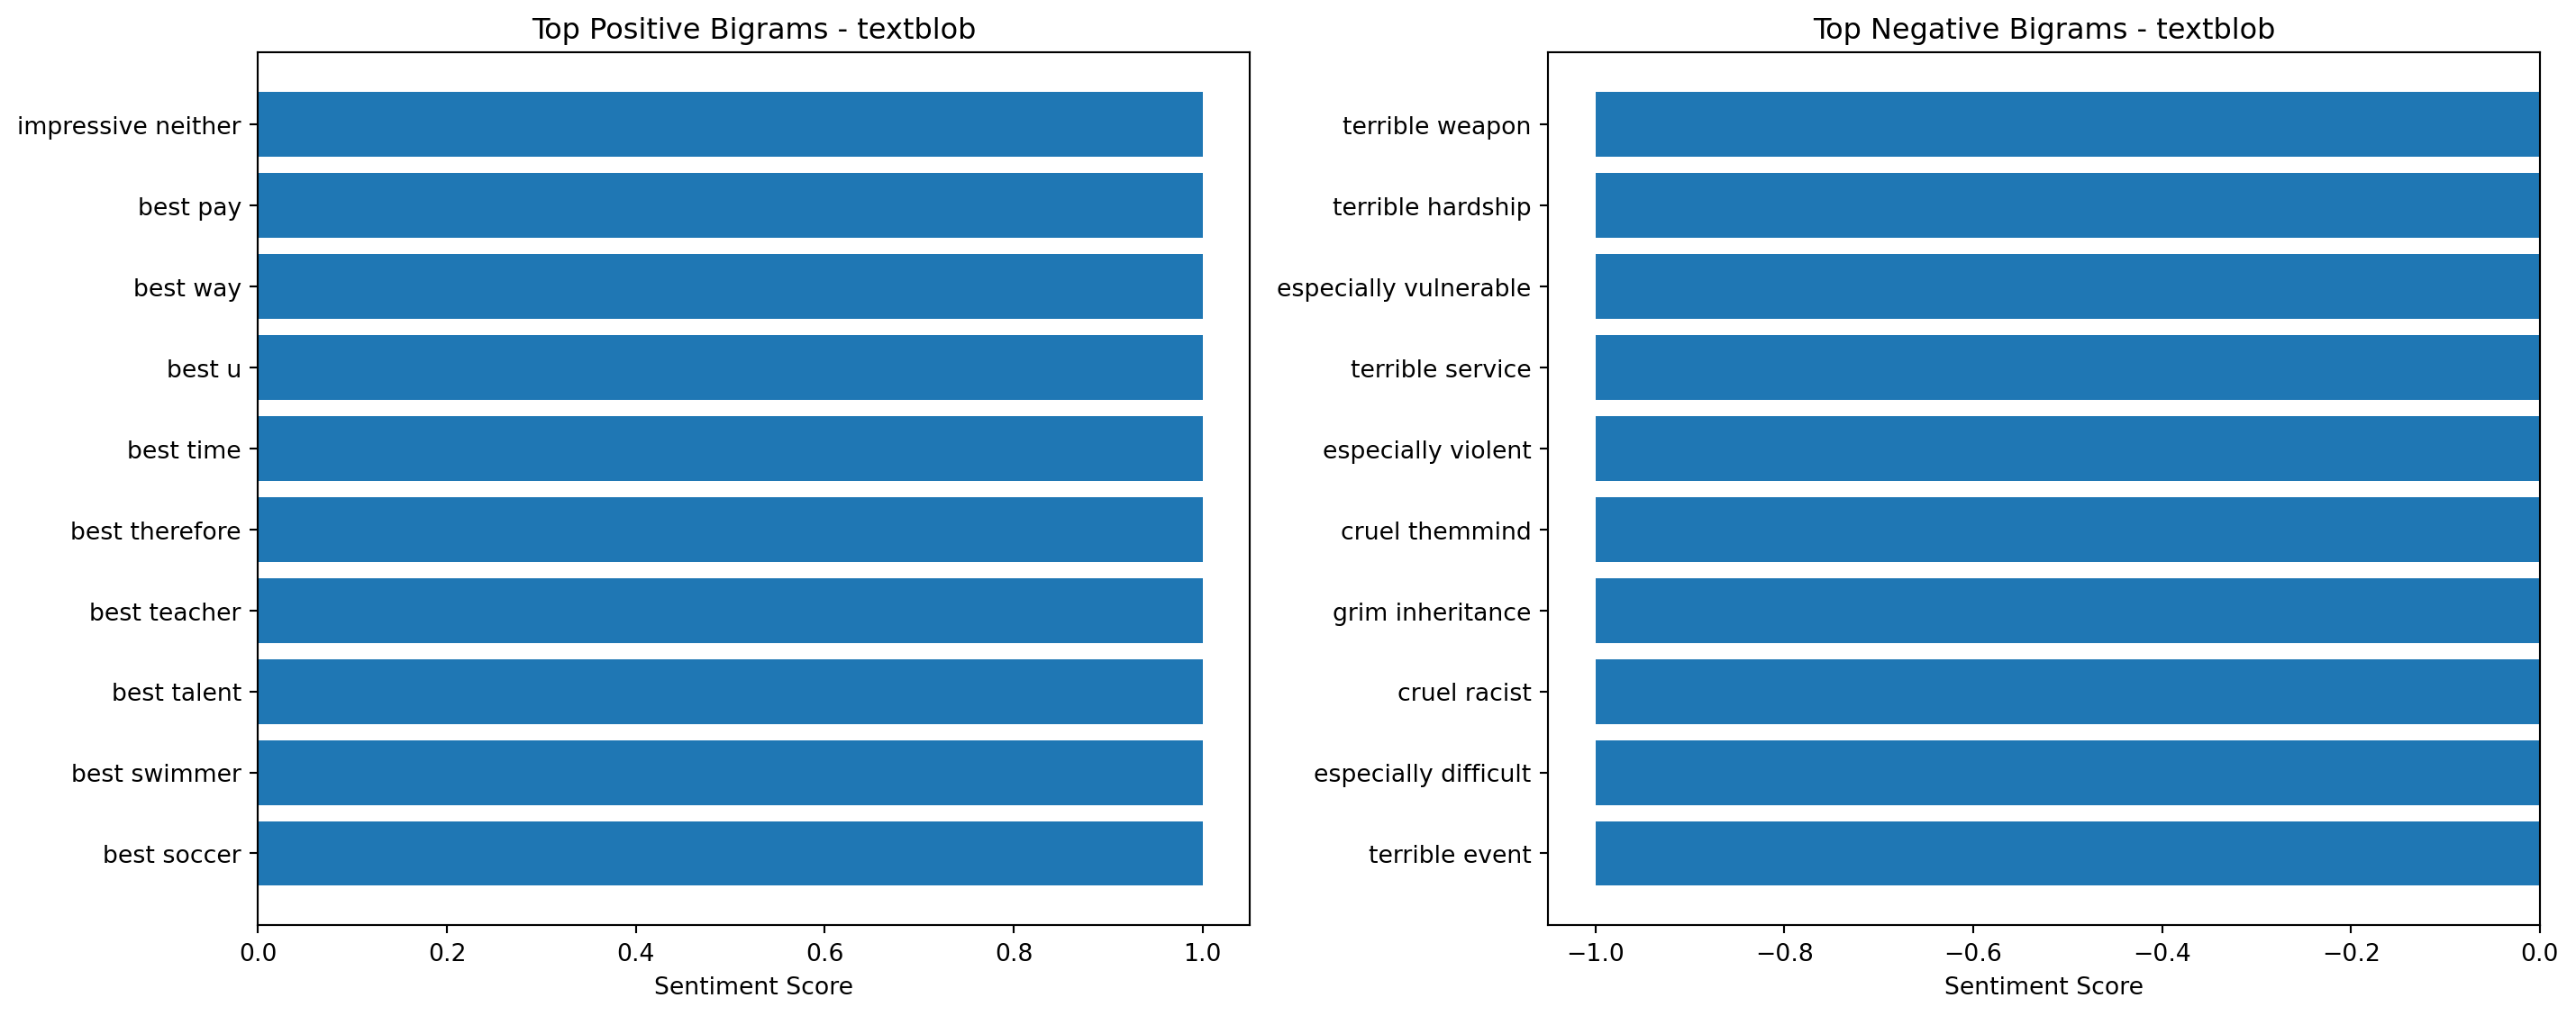

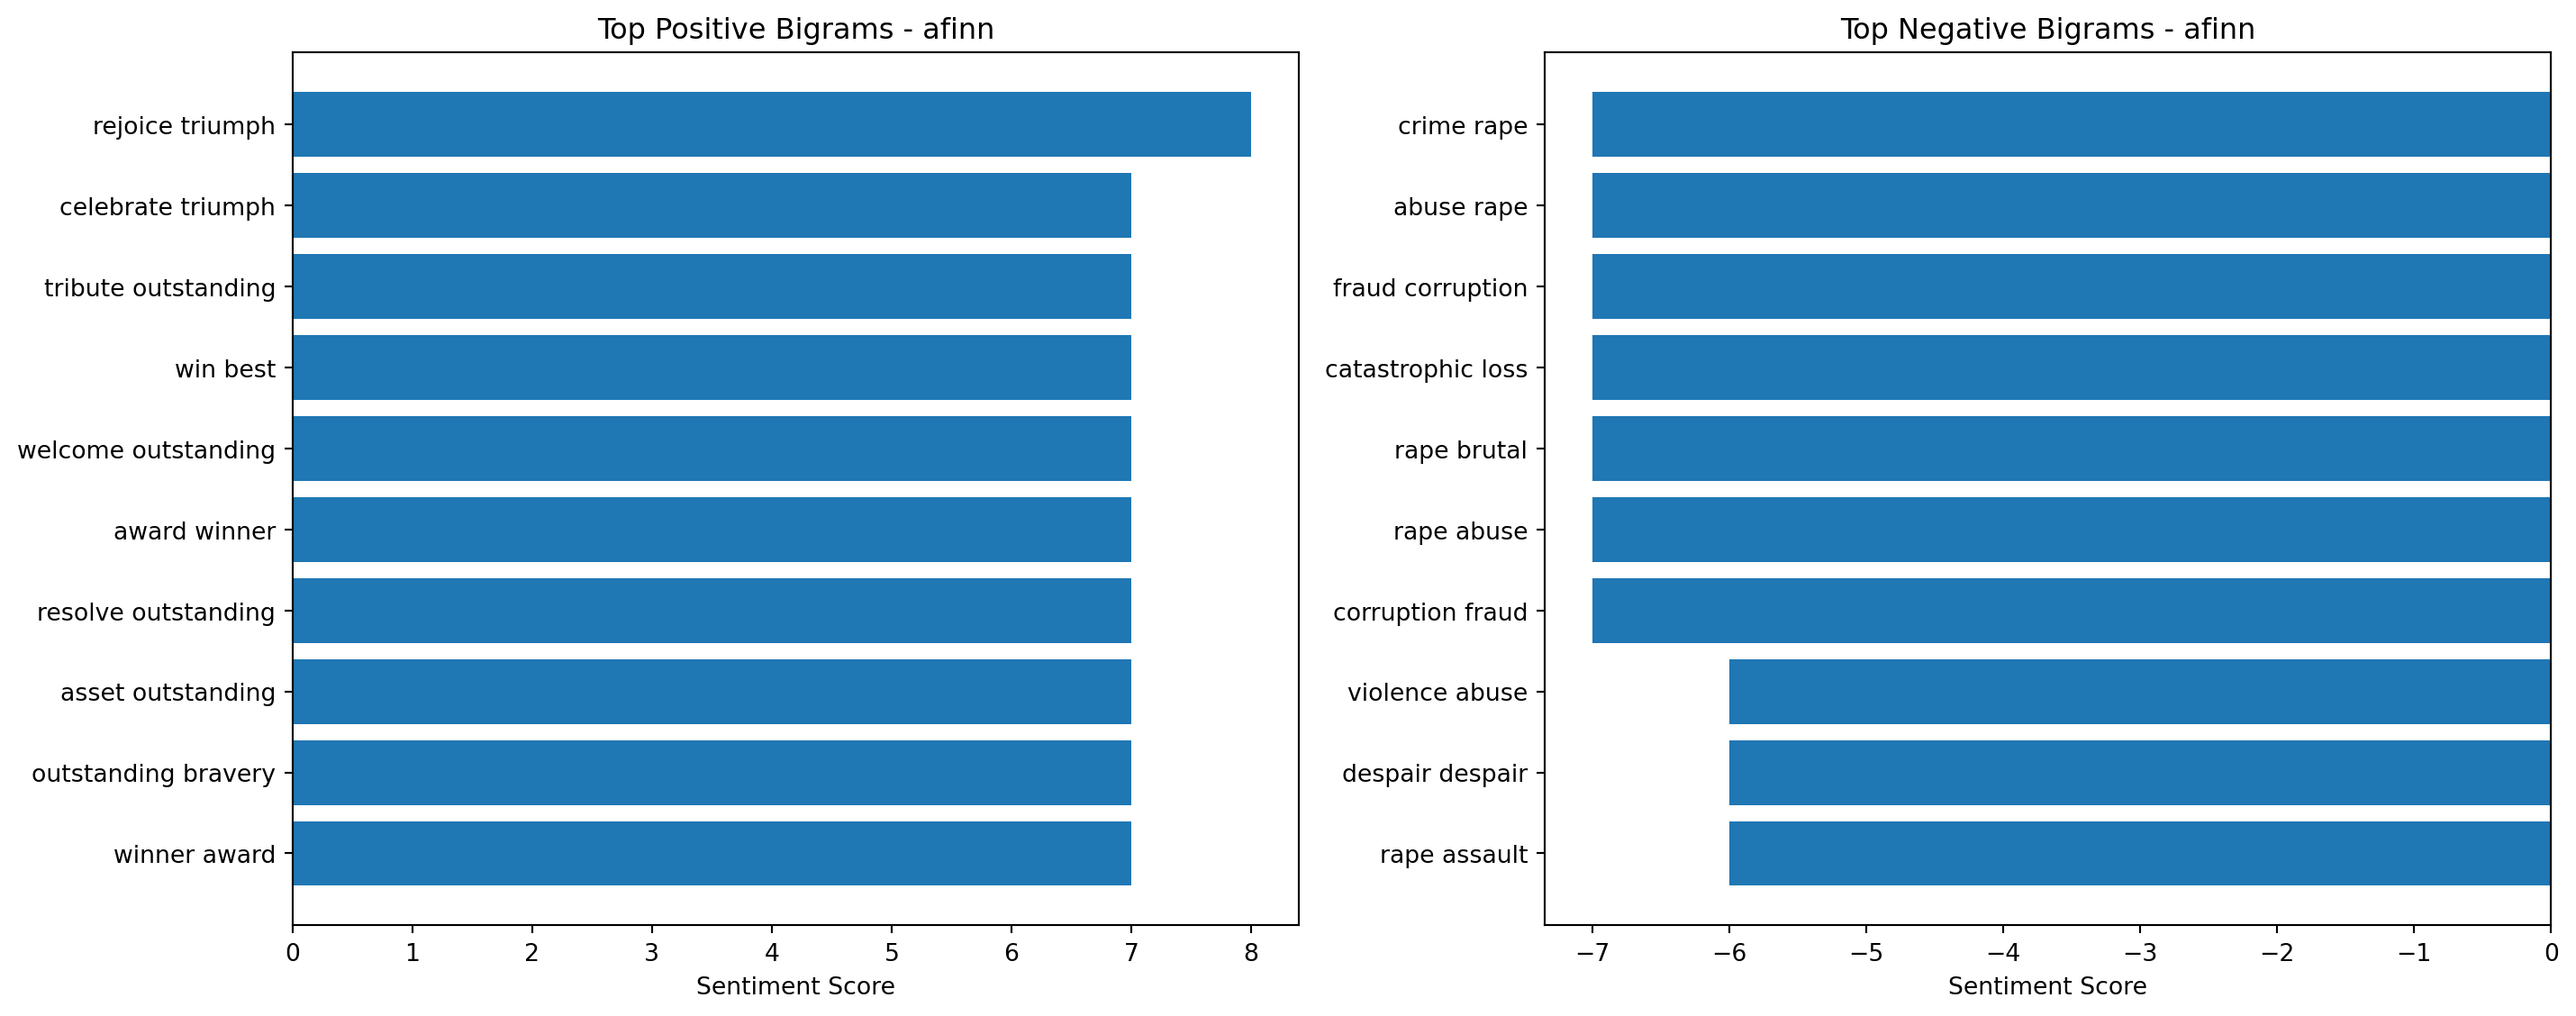

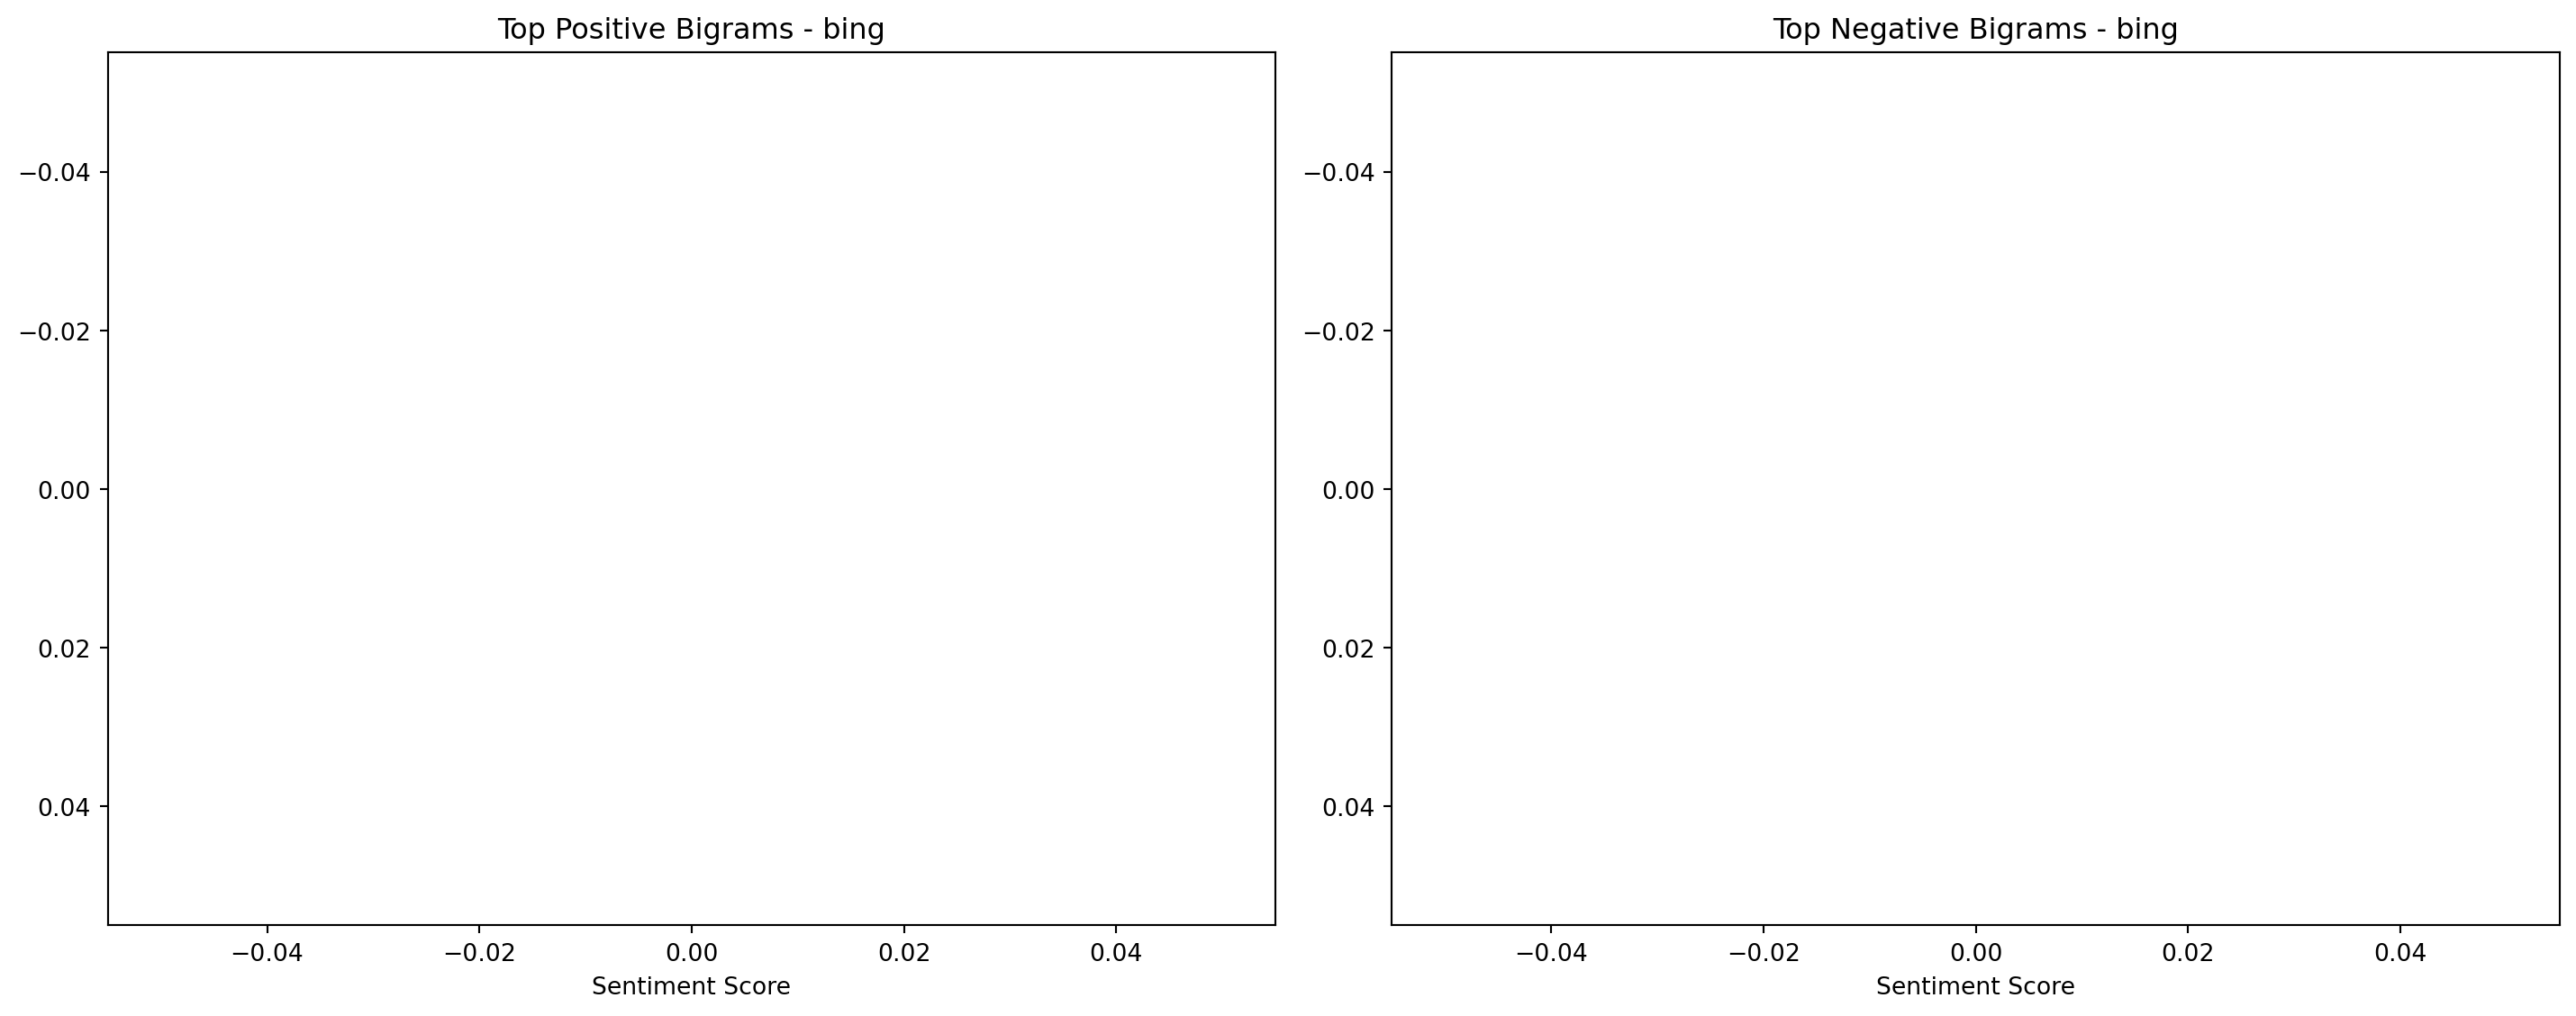

In [15]:
# OLD CODE

import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from textblob import TextBlob
from afinn import Afinn
from nltk.util import bigrams
from itertools import chain

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK's part-of-speech tags to WordNet's part-of-speech tags
def get_wordnet_pos(word):
    """Map NLTK part of speech tags to WordNet part of speech tags."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}
    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

# Clean the text, convert to lowercase, and lemmatize each word
def clean_text_bi(text):
    # Remove special characters: keep only letters, numbers, and basic punctuation
    text = re.sub(r'[.]', ' ', text)  # Replaces periods with spaces
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    text = text.lower()  # Convert to lowercase
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize each word with its POS tag
    lemmatized_words = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words]
    
    return lemmatized_words

# Apply the cleaning and lemmatization to the dataset
sona_speeches_df['bigram_words'] = sona_speeches_df['speech'].apply(clean_text_bi)

# Initialize Afinn and prepare Bing lexicon
afinn = Afinn()
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to calculate sentiment scores using Afinn
def afinn_sentiment(text):
    return afinn.score(text)

# Function to calculate sentiment scores using Bing lexicon
def bing_sentiment(word):
    if word in positive_words:
        return 1  # Positive sentiment
    elif word in negative_words:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Function to get sentiment score for a bigram
def bigram_sentiment(bigram, lexicon_score_func):
    return lexicon_score_func(' '.join(bigram))

# Function to analyze the sentiment of bigrams
def analyze_bigram_sentiment(cleaned_words_list):
    bigram_list = list(bigrams(cleaned_words_list))
    
    # Calculate sentiment for each bigram
    tb_sentiments = [TextBlob(' '.join(bigram)).sentiment.polarity for bigram in bigram_list]
    afinn_sentiments = [afinn_sentiment(' '.join(bigram)) for bigram in bigram_list]
    bing_sentiments = [bigram_sentiment(bigram, bing_sentiment) for bigram in bigram_list]
    
    sentiment_data = pd.DataFrame({
        'bigram': [' '.join(bigram) for bigram in bigram_list],
        'textblob': tb_sentiments,
        'afinn': afinn_sentiments,
        'bing': bing_sentiments
    })
    
    return sentiment_data

# Apply the sentiment analysis for bigrams
all_bigram_sentiments = pd.concat([analyze_bigram_sentiment(words) for words in sona_speeches_df['bigram_words']])

# Group by bigram and calculate mean sentiment
aggregated_bigram_sentiments = all_bigram_sentiments.groupby('bigram').agg('mean').reset_index()

# Function to plot bar graphs for the bigrams that contribute most to sentiment
def plot_bigram_sentiment_words(sentiment_df, lexicon_name):
    top_positive_bigrams = sentiment_df[sentiment_df[lexicon_name] > 0].sort_values(by=lexicon_name, ascending=False).head(10)
    top_negative_bigrams = sentiment_df[sentiment_df[lexicon_name] < 0].sort_values(by=lexicon_name).head(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].barh(top_positive_bigrams['bigram'], top_positive_bigrams[lexicon_name])
    axes[0].set_title(f'Top Positive Bigrams - {lexicon_name}')
    axes[0].invert_yaxis()  # labels read top-to-bottom
    axes[0].set_xlabel('Sentiment Score')

    axes[1].barh(top_negative_bigrams['bigram'], top_negative_bigrams[lexicon_name])
    axes[1].set_title(f'Top Negative Bigrams - {lexicon_name}')
    axes[1].invert_yaxis()  # labels read top-to-bottom
    axes[1].set_xlabel('Sentiment Score')

    plt.tight_layout()
    plt.show()

# Plot for each lexicon
plot_bigram_sentiment_words(aggregated_bigram_sentiments, 'textblob')
plot_bigram_sentiment_words(aggregated_bigram_sentiments, 'afinn')

# TODO: Fix Bing lexicon for bigrams
plot_bigram_sentiment_words(aggregated_bigram_sentiments, 'bing')


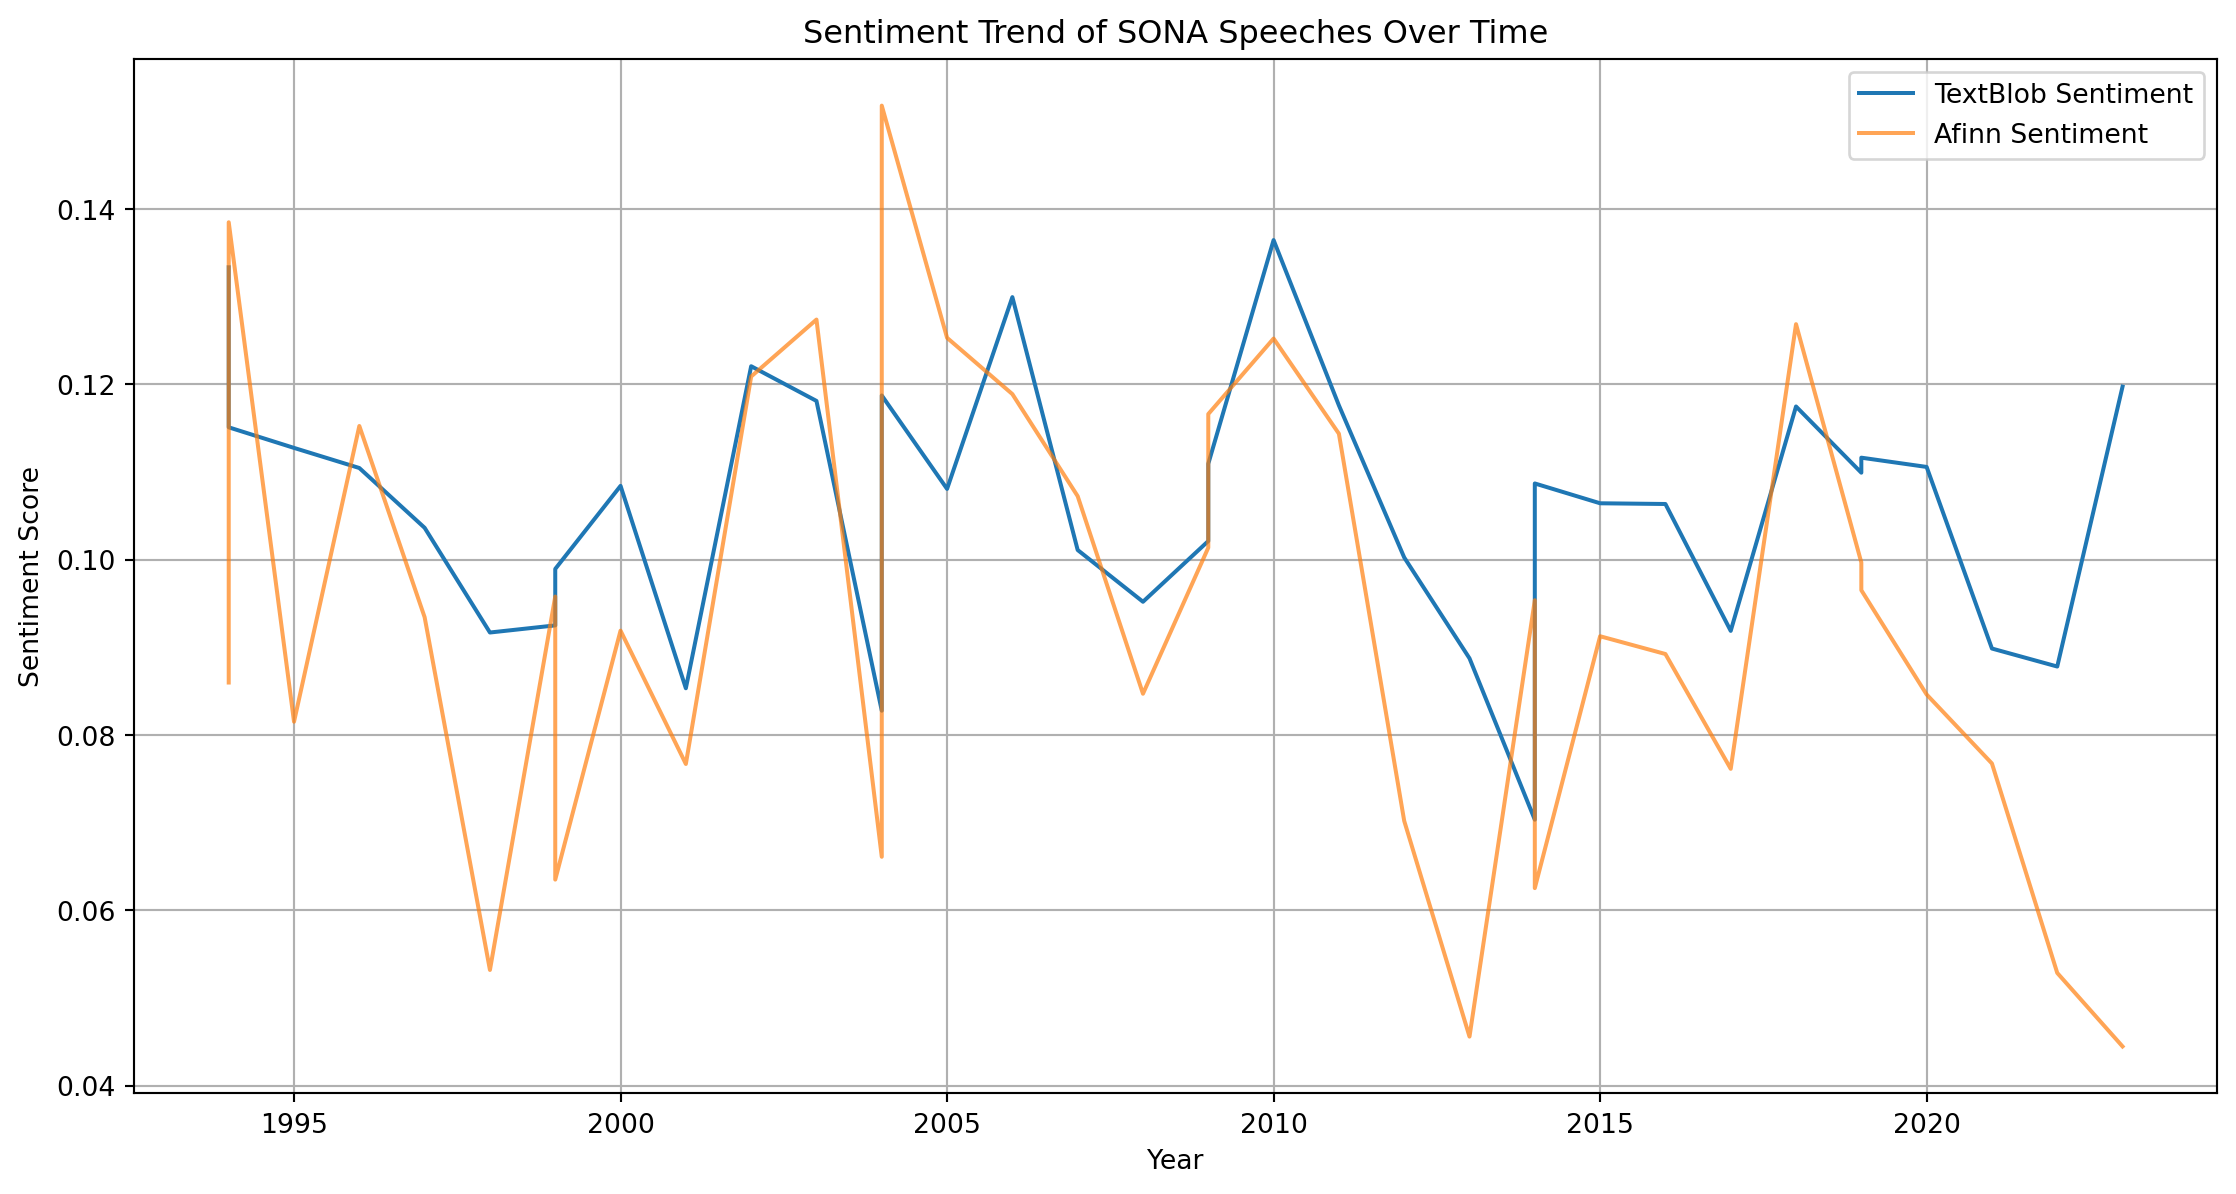

In [16]:
# Function to calculate overall sentiment for a speech using TextBlob
def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Function to calculate overall sentiment for a speech using Afinn (normalized)
def afinn_sentiment(text):
    afinn = Afinn()
    words = text.split()  # Split text into words
    if len(words) > 0:   # Avoid division by zero
        return afinn.score(text) / len(words)  # Normalized score
    else:
        return 0


# Calculate sentiment scores
sona_speeches_df['textblob_sentiment'] = sona_speeches_df['speech'].apply(textblob_sentiment)
sona_speeches_df['afinn_sentiment'] = sona_speeches_df['speech'].apply(afinn_sentiment)

# Ensure the 'year' column is of type int if it's not already
sona_speeches_df['year'] = sona_speeches_df['year'].astype(int)

# Sort by year
sona_speeches_df.sort_values('year', inplace=True)

# Plotting the sentiment trend over time
plt.figure(figsize=(14, 7))

# TextBlob sentiment trend
plt.plot(sona_speeches_df['year'], sona_speeches_df['textblob_sentiment'], label='TextBlob Sentiment')

# Afinn sentiment trend
plt.plot(sona_speeches_df['year'], sona_speeches_df['afinn_sentiment'], label='Afinn Sentiment', alpha=0.7)

plt.title('Sentiment Trend of SONA Speeches Over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import matplotlib.pyplot as plt
from gensim.models import LsiModel, TfidfModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.utils import simple_preprocess

texts = sona_speeches_clean['speech']
# Further process tokens using gensim's simple_preprocess
tokenized_texts = [simple_preprocess(doc, deacc=True) for doc in texts]  # deacc=True removes punctuations

# Create a Gensim dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=2, no_above=0.75)

# Create a BOW corpus
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Create a TF-IDF corpus
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

# Define the function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, start, limit, step, coherence='u_mass'):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenized_texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Set parameters
start, limit, step = 2, 20, 1

# Compute coherence values for BOW
bow_model_list, bow_coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=texts, start=start, limit=limit, step=step)

# Compute coherence values for TF-IDF
tfidf_model_list, tfidf_coherence_values = compute_coherence_values(dictionary=dictionary, corpus=tfidf_corpus, texts=tokenized_texts, start=start, limit=limit, step=step)


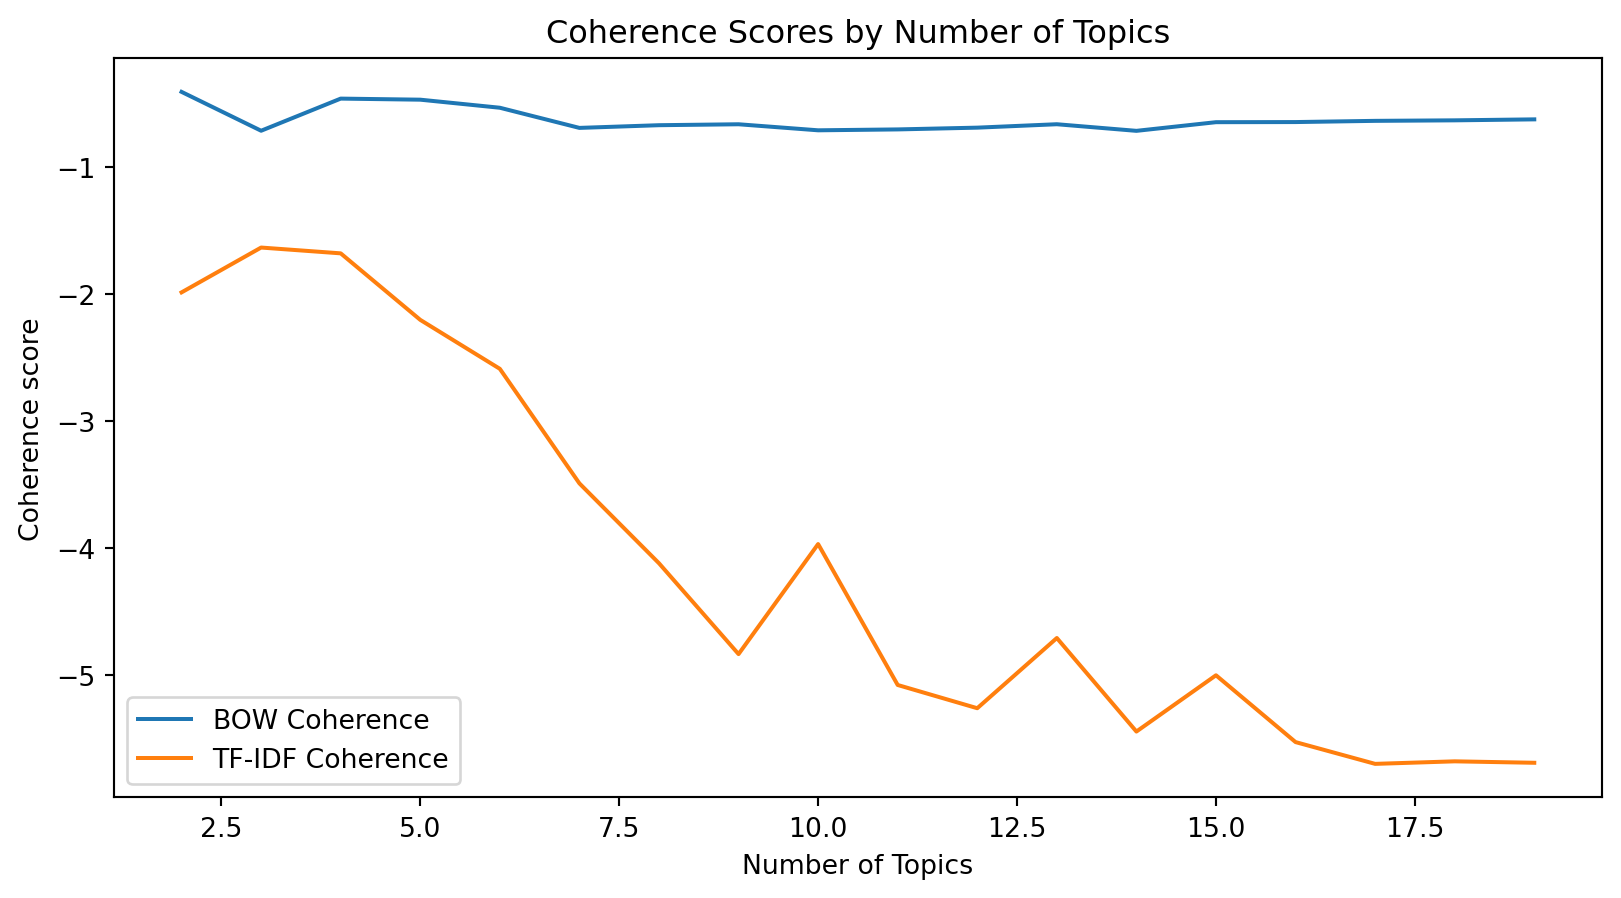

In [18]:
# Plotting the coherence values
x = range(start, limit, step)
plt.figure(figsize=(10, 5))
plt.plot(x, bow_coherence_values, label='BOW Coherence')
plt.plot(x, tfidf_coherence_values, label='TF-IDF Coherence')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Scores by Number of Topics")
plt.legend()
plt.show()

In [19]:
# Word frequency plots for the top 10 words for each topic
from collections import Counter


In [20]:
sona_speeches_clean['speech'].to_csv('data/sona_speeches_only.csv', index=False)

PLSA:
====
Number of topics:     5
Number of documents:  36
Number of words:      5755
Number of iterations: 0


PLSA:
====
Number of topics:     5
Number of documents:  36
Number of words:      5755
Number of iterations: 61
[0.21825486 0.21218278 0.21140115 0.1939409  0.1642203 ]


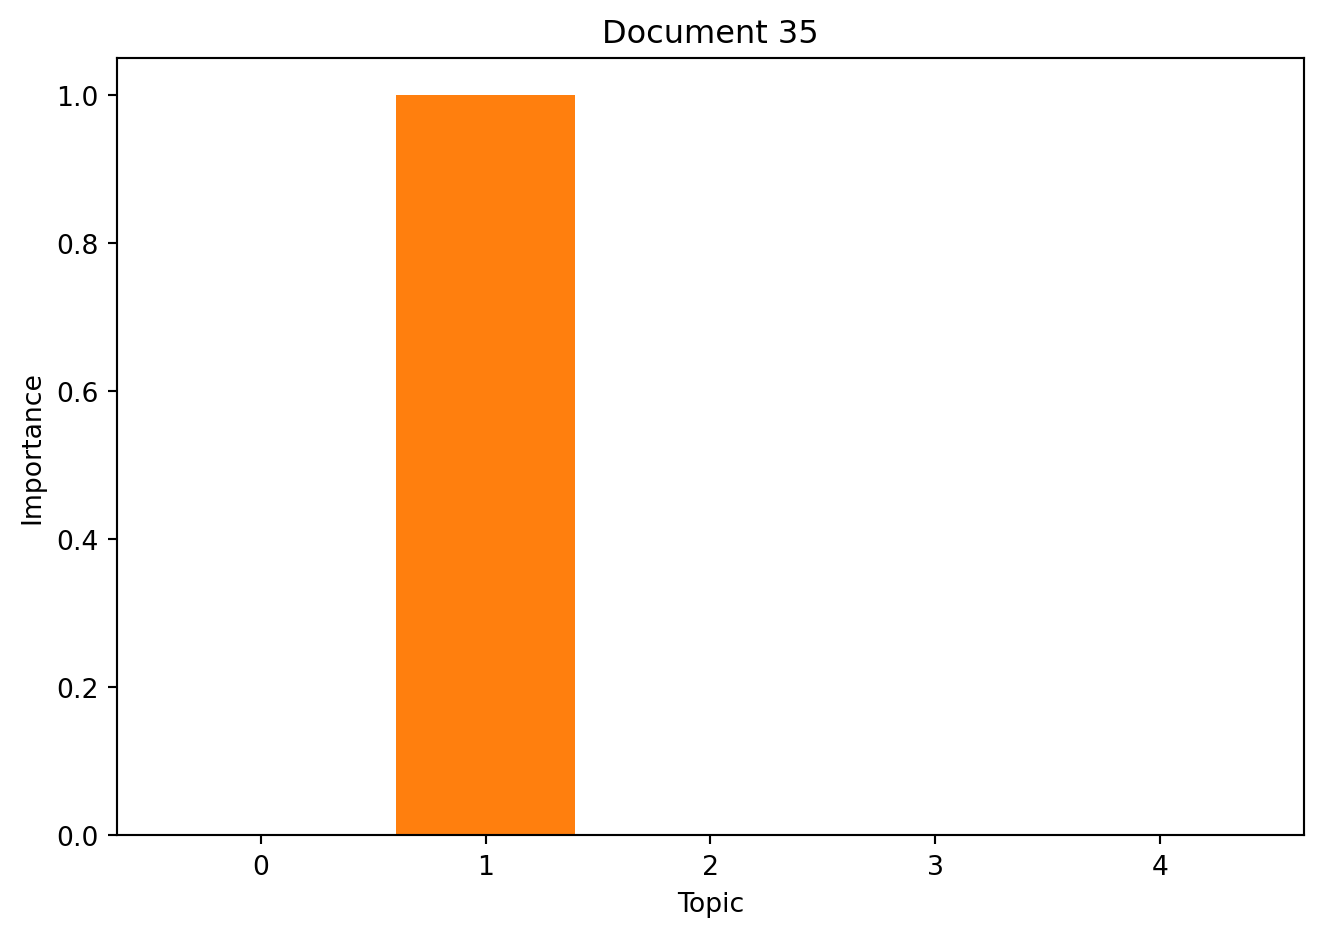

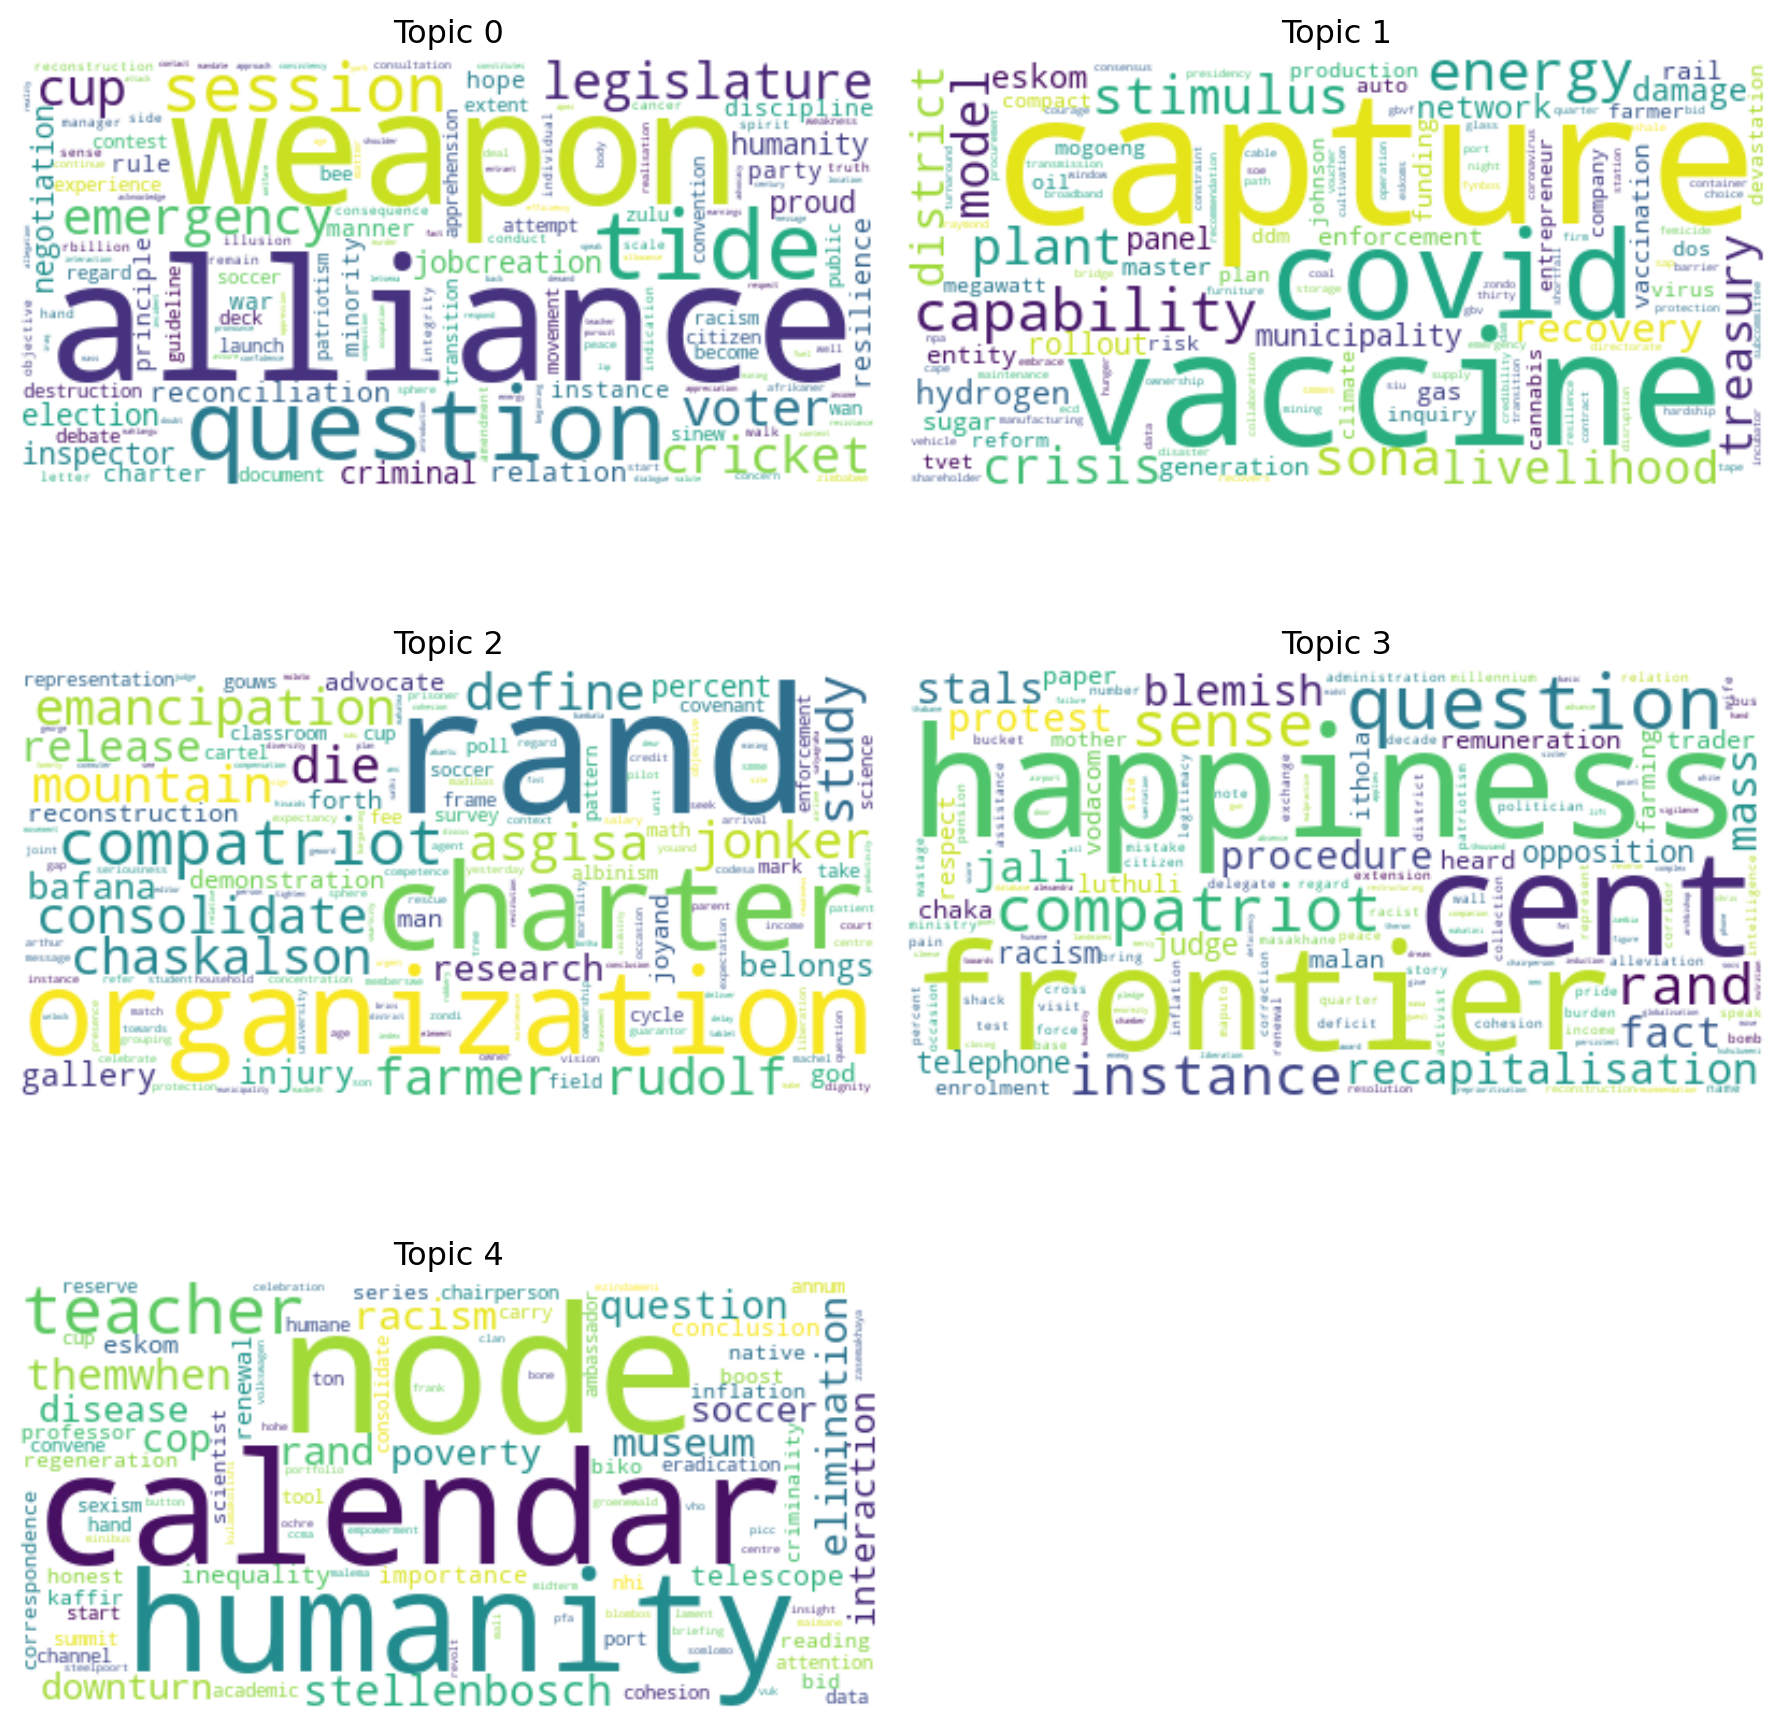

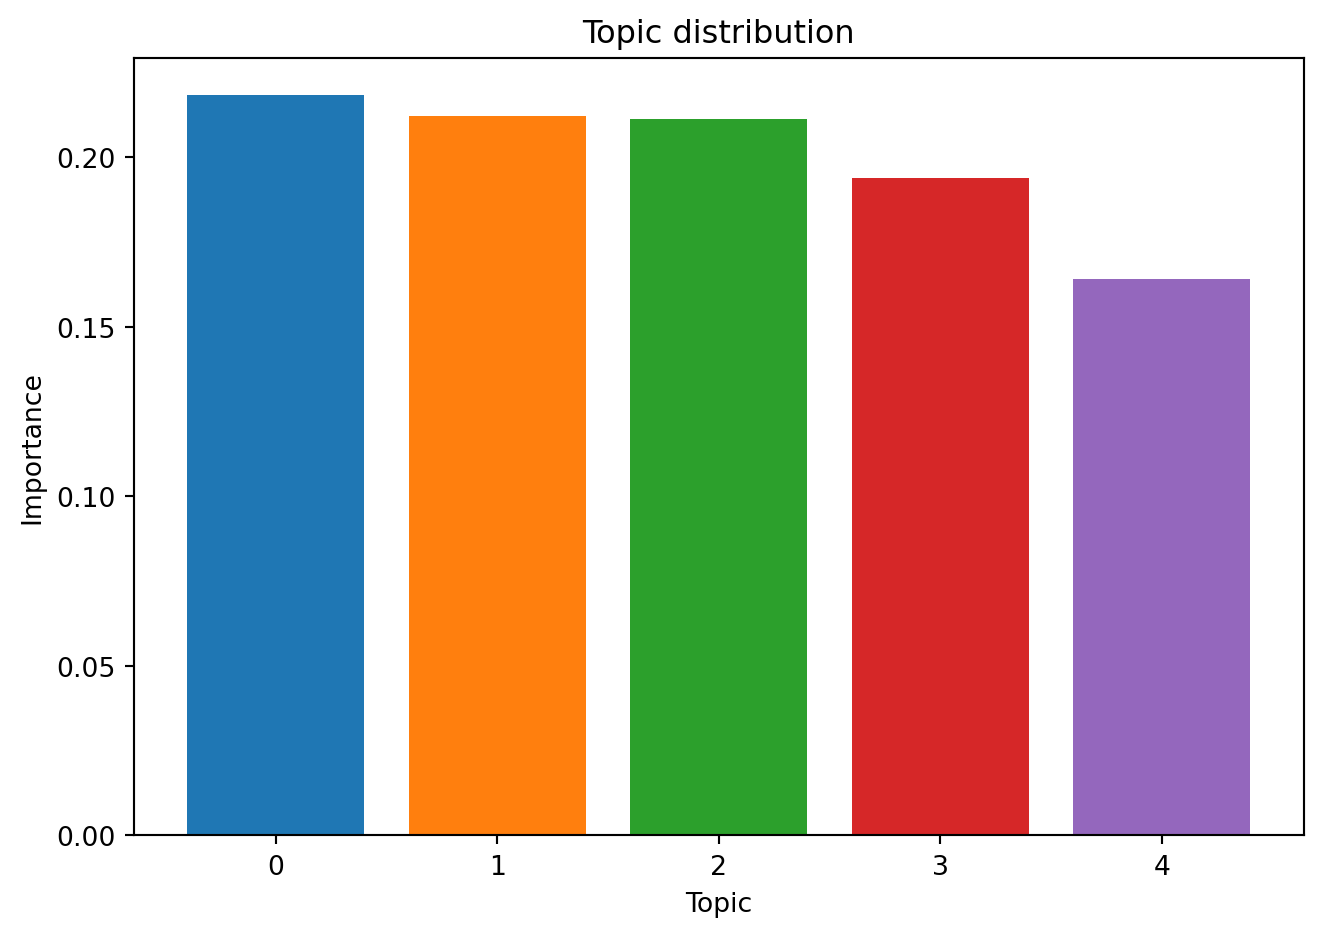

In [21]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

corpus = Corpus.from_csv("data/sona_speeches_only.csv", pipeline)
corpus

n_topics = 5

plsa = PLSA(corpus, n_topics, True)
print(plsa)

result = plsa.fit()
print(plsa)

print(result.topic)

visualize = Visualize(result)
visualize

fig, ax = plt.subplots()
_ = visualize.topics_in_doc(35, ax)
fig.tight_layout()


fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)

fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()


# To visualize the word-topic distributions
# Visualize.words(plsa.word_topics, corpus)

In [22]:
import numpy as np
import gensim
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
import tqdm

texts = sona_speeches_clean['speech']
# Further process tokens using gensim's simple_preprocess
tokenized_texts = [simple_preprocess(doc, deacc=True) for doc in texts]  # deacc=True removes punctuations

# Create a Gensim dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=3, no_above=0.7)

# Create a BOW corpus
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Create a TF-IDF corpus
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

# Define the function to compute coherence values
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=k, 
                         random_state=100,
                         chunksize=2000,
                         iterations=400,
                         passes=20,
                         eval_every=None,
                         alpha=a,
                         eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='u_mass')
    
    return coherence_model_lda.get_coherence()

# Define the parameter space for grid search
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.1, 1, 0.1))
# Beta parameter
beta = list(np.arange(0.1, 1, 0.2))

# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [tfidf_corpus, 
               bow_corpus]
corpus_title = ['TF-IDF Corpus', 'BoW Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
# If you want to only test a few models, reduce the number of steps in topics_range
# and/or limit the number of values in alpha and beta lists.
# if 1 == 1:
#     pbar = tqdm.tqdm(total=(max_topics-min_topics)*len(alpha)*len(beta)*len(corpus_sets))
    
#     # iterate through validation corpuses
#     for i in range(len(corpus_sets)):
#         # iterate through number of topics
#         for k in topics_range:
#             # iterate through alpha values
#             for a in alpha:
#                 # iterare through beta values
#                 for b in beta:
#                     # get the coherence score for the given parameters
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, k=k, a=a, b=b)
#                     # Save the model results
#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pbar.close()


In [23]:
# Save the results to a csv
#model_results_df = pd.DataFrame(model_results)
#model_results_df.to_csv('data/sona_speeches_lda.csv', index=False)

In [24]:
# Save the results to a csv
model_results_df = pd.read_csv('data/sona_speeches_lda.csv')
model_results_df.sort_values(by='Coherence', ascending=False).head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
364,BoW Corpus,2,0.1,0.9,-0.367989
369,BoW Corpus,2,0.2,0.9,-0.367989
379,BoW Corpus,2,0.4,0.9,-0.377293
394,BoW Corpus,2,0.7,0.9,-0.377293
389,BoW Corpus,2,0.6,0.9,-0.377293
384,BoW Corpus,2,0.5,0.9,-0.377293
374,BoW Corpus,2,0.3,0.9,-0.377293
382,BoW Corpus,2,0.5,0.5,-0.378270
387,BoW Corpus,2,0.6,0.5,-0.378270
377,BoW Corpus,2,0.4,0.5,-0.378270


In [25]:
import pyLDAvis.gensim_models
import gensim

# Train the best models for each corpus
lda_model_bow = LdaModel(corpus=bow_corpus,
                         id2word=dictionary,
                         num_topics=2, 
                         random_state=100,
                         chunksize=2000,
                         iterations=400,
                         passes=20,
                         eval_every=None,
                         alpha=0.1,
                         eta=0.9)

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model_bow, bow_corpus, dictionary)


In [26]:
# Enable the automatic display of visualizations in the Jupyter notebook
pyLDAvis.enable_notebook()

# Display the visualization
pyLDAvis.display(vis_data)


Topics: 2, Coherence Score: -0.017139533850121964


Topics: 4, Coherence Score: -0.03385820882515539


Topics: 6, Coherence Score: -0.04523466812657284


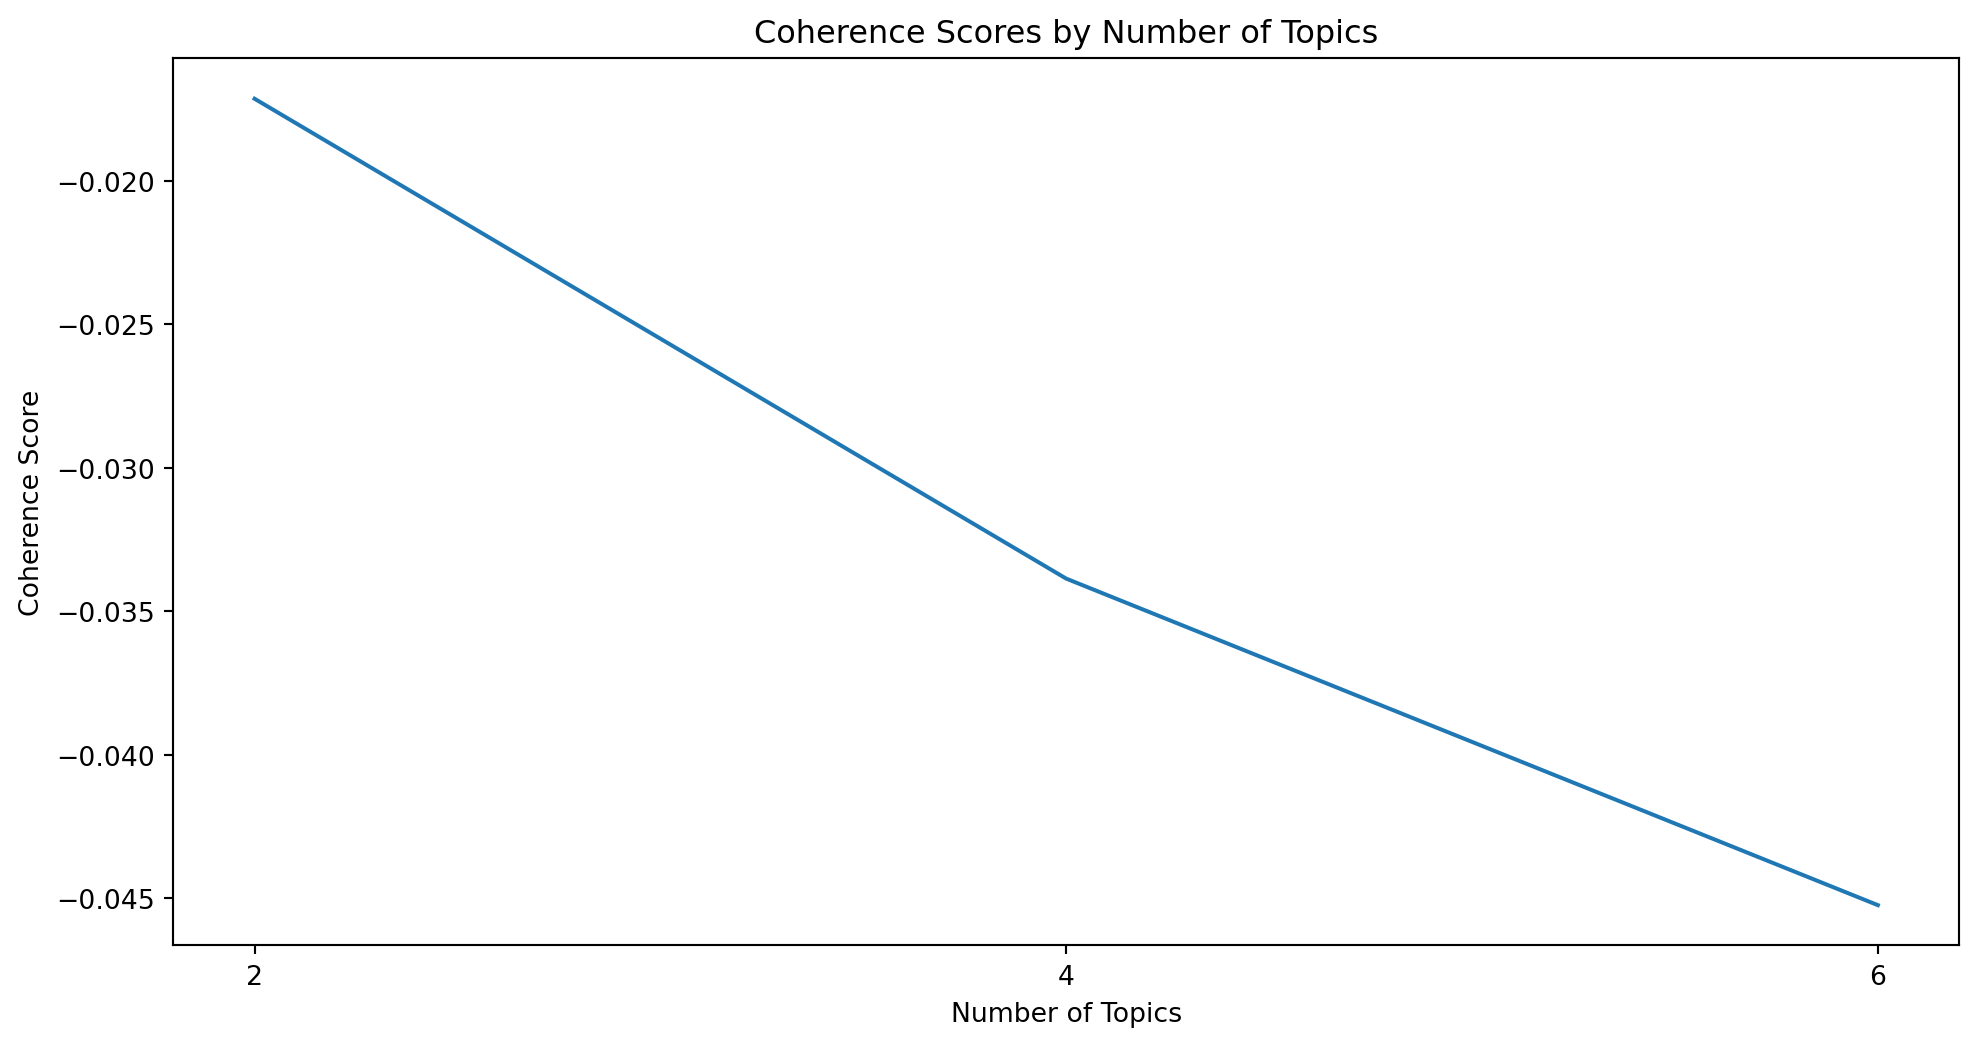

In [27]:
import tomotopy as tp
import matplotlib.pyplot as plt

# Function to calculate coherence scores
def calculate_coherence(model, metric='u_mass'):
    coherence = tp.coherence.Coherence(model, coherence=metric)
    return coherence.get_score()

# Prepare the data for the CTM model
tokenized_docs = [text.split() for text in sona_speeches_clean['speech']]  # Ensure the texts are tokenized

# Define the range of topic numbers you want to test
topic_numbers = range(2, 8, 2)  # for example from 2 to 20 by step of 2

# Store coherence scores for plotting
coherence_scores = []

for k in topic_numbers:
    # Initialize CTM with the current number of topics
    ctm = tp.CTModel(k=k)

    # Add documents to the model
    for tokens in tokenized_docs:
        ctm.add_doc(tokens)

    # Train the model
    ctm.train(0)
    for _ in range(100):
        ctm.train(10)

    # Calculate and store the coherence score
    score = calculate_coherence(ctm)
    coherence_scores.append(score)
    print(f"Topics: {k}, Coherence Score: {score}")

# Plot the coherence scores
plt.figure(figsize=(12, 6))
plt.plot(topic_numbers, coherence_scores)
plt.title('Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_numbers)
plt.show()

Num Topics: 2, Coherence Score: -0.43026744425054525
Num Topics: 4, Coherence Score: -0.40158105371781055


Num Topics: 6, Coherence Score: -0.5039275004106669


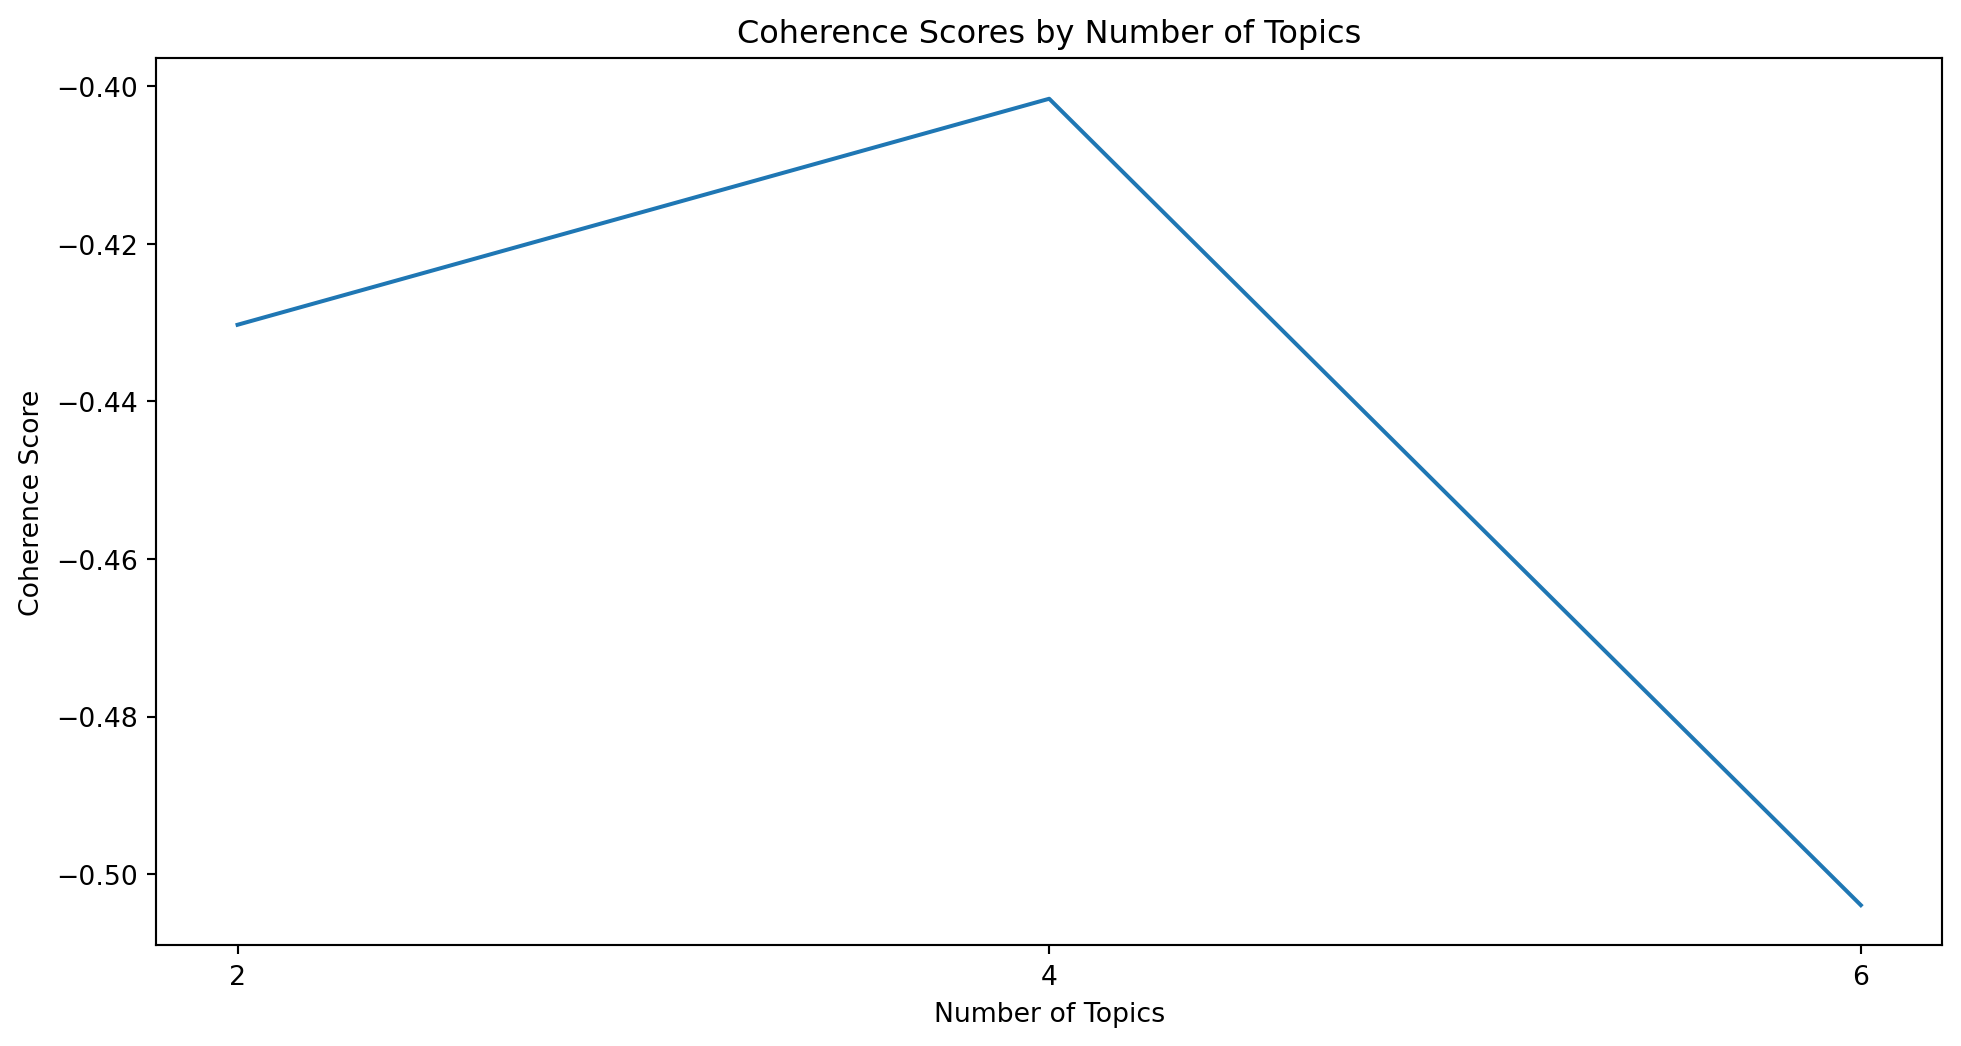

In [28]:
# Note that ATM only works for BoW. Raw word counts (BoW) is standard because these models are based on the assumption that the data is generated from a multinomial distribution, which does not hold with TF-IDF weights.

from gensim.models import AuthorTopicModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Prepare the data for the AuthorTopicModel
# Create a mapping of authors to documents
author2doc = {author: [] for author in sona_speeches_clean['president'].unique()}
for i, row in sona_speeches_clean.iterrows():
    author2doc[row['president']].append(i)

# Define the range of topic numbers you want to test
topic_numbers = range(2, 8, 2)  # for example from 2 to 20 by step of 2

# Store coherence scores for plotting
coherence_scores = []

for num_topics in topic_numbers:
    # Author-Topic LDA model with the current number of topics
    author_topic_model = AuthorTopicModel(corpus=bow_corpus, author2doc=author2doc, id2word=dictionary, num_topics=num_topics)

    # Train the model
    author_topic_model.update(bow_corpus, author2doc=author2doc)

    # Compute coherence score
    cm = CoherenceModel(model=author_topic_model, texts=tokenized_docs, dictionary=dictionary, coherence='u_mass')
    coherence = cm.get_coherence()
    coherence_scores.append(coherence)
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence}")

# Plot the coherence scores
plt.figure(figsize=(12, 6))
plt.plot(topic_numbers, coherence_scores)
plt.title('Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_numbers)
plt.show()
